In [1]:
import torch
import torchvision
import torchvision.transforms as T
import torchvision.models as models


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions.laplace import Laplace
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import  tqdm
import seaborn as sns; sns.set()
import pickle as pkl
from pathlib import Path
from functools import partial
import pandas as pd

import plotly.express as px
sns.set(rc={'figure.figsize':(15, 6)})

In [2]:
!ls logs/full_signal_resnet_all

cycle_10.csv  cycle_2.csv  cycle_4.csv	cycle_6.csv  cycle_8.csv
cycle_1.csv   cycle_3.csv  cycle_5.csv	cycle_7.csv  cycle_9.csv


In [8]:
logs = pd.read_csv('logs/full_signal_resnet_all/cycle_10.csv')

In [9]:
logs

,Unnamed: 0,CycleNum,individualID,arch,score,overfit,hidx
0,0,0,0,resnet34,0.756347,True,10
1,1,0,1,resnet18,0.766965,True,7
2,2,0,2,resnet18,0.767727,True,5
3,3,0,3,resnet50,0.771556,False,7
4,4,0,4,resnet18,0.787713,True,2
...,...,...,...,...,...,...,...
95,95,9,5,resnet18,0.831586,True,8
96,96,9,6,resnet101,0.834372,True,4
97,97,9,7,resnet18,0.827249,True,5
98,98,9,8,resnet18,0.835891,True,5


In [10]:
logs['hidx'] = [0]*10 + logs['hidx'].tolist()[:-10]

In [11]:
logs['Epoch'] = logs['CycleNum'] * 3  

In [12]:
logs['archid'] = logs['individualID'].astype(str) +  ' ' +  logs['arch']

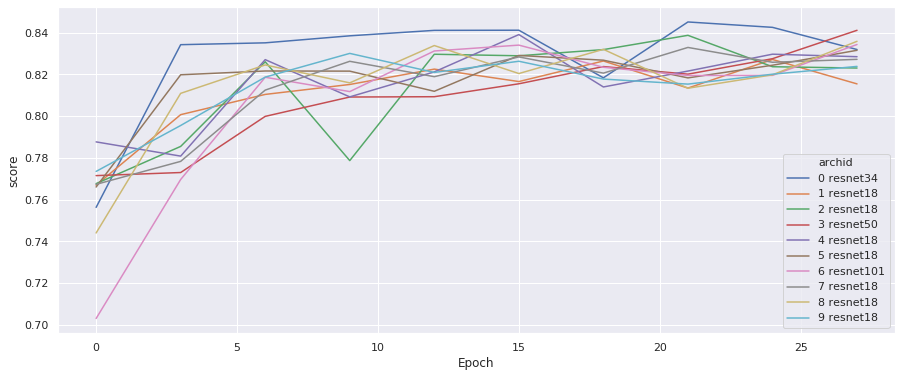

In [14]:
sns.lineplot(data=logs,x='Epoch', y='score', hue='archid')

In [16]:
!ls logs

full_signal_resnet18  full_signal_resnet_all  no_signal_resnet18


In [18]:
logs18full = pd.read_csv('./logs/full_signal_resnet18/cycle_10.csv')

In [19]:
logs18full

,Unnamed: 0,CycleNum,individualID,score,overfit,hidx
0,0,0,0,0.748183,True,8
1,1,0,1,0.781745,True,9
2,2,0,2,0.774559,True,6
3,3,0,3,0.773220,True,1
4,4,0,4,0.766975,True,6
...,...,...,...,...,...,...
95,95,9,5,0.826467,True,6
96,96,9,6,0.827066,True,5
97,97,9,7,0.813669,True,5
98,98,9,8,0.829446,True,5


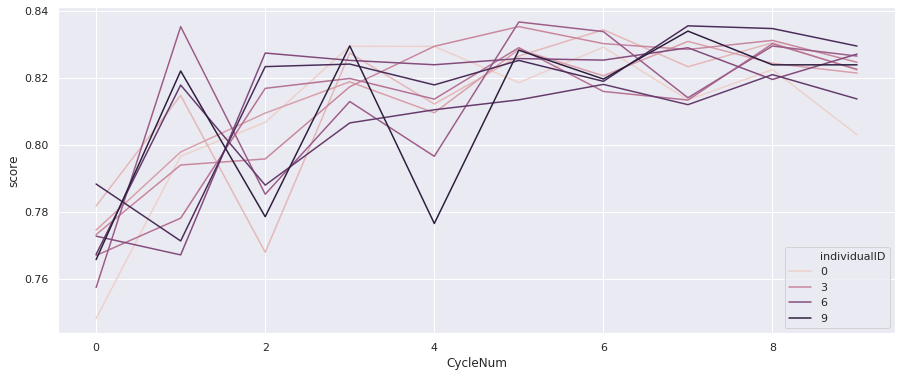

In [20]:
sns.lineplot(data=logs18full, x='CycleNum', y='score', hue='individualID')